<html><div style="font-size:7pt">This notebook may contain text, code and images generated by artificial intelligence. Used model: openai/gpt-oss-120b, vision model: None, endpoint: https://llm.scads.ai/v1, bia-bob version: 0.34.3.. It is good scientific practice to check the code and results it produces carefully. <a href="https://github.com/haesleinhuepf/bia-bob">Read more about code generation using bia-bob</a></div></html>

# Blob Analysis Notebook

This notebook demonstrates how to load a 3‑D image, segment bright blobs using simple thresholding, label the connected components, measure their areas and report the average area.

## Steps

1. Import the required libraries.
2. Load the image *data/blobs.tif*.
3. Apply Otsu thresholding to obtain a binary mask of the bright blobs.
4. Perform connected component labeling on the binary mask.
5. Measure the area of each labelled object.
6. Compute and print the average area.

In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import stackview
import pyclesperanto as cle


### Load the image

The image *blobs.tif* is located in the `data` folder. We read it with **skimage.io.imread** and inspect its shape.

Image shape: (254, 256)


[[ 40  32  24 ... 216 200 200]
 [ 56  40  24 ... 232 216 216]
 [ 64  48  24 ... 240 232 232]
 ...
 [ 72  80  80 ...  48  48  48]
 [ 80  80  80 ...  48  48  48]
 [ 96  88  80 ...  48  48  48]]
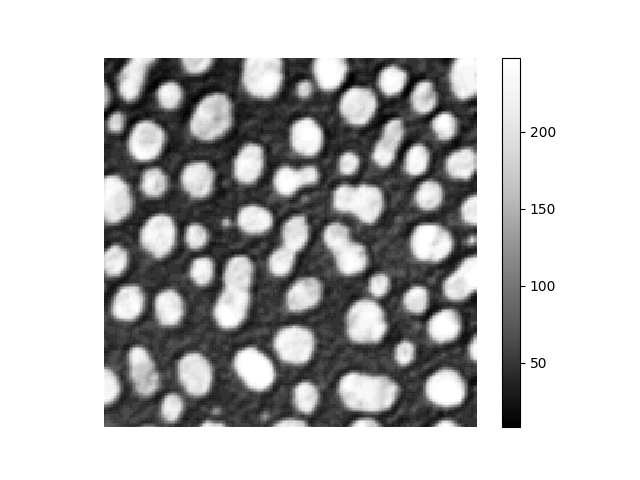
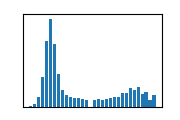

In [2]:
image_path = os.path.join('data', 'blobs.tif')
image = imread(image_path)
print('Image shape:', image.shape)
stackview.insight(image)


### Segment bright blobs using Otsu thresholding

We compute a global Otsu threshold and generate a binary mask where voxels brighter than the threshold are set to 1.

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
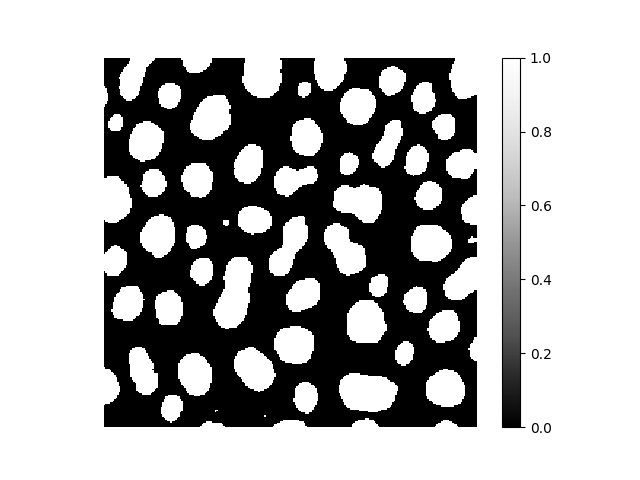
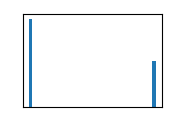

In [3]:
threshold = threshold_otsu(image)
binary = image > threshold
stackview.insight(binary.astype(np.uint8))


### Connected component labeling

We label the binary mask using **pyclesperanto.connected_component_labeling** which returns a label image where each distinct blob has a unique integer ID.

[[0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
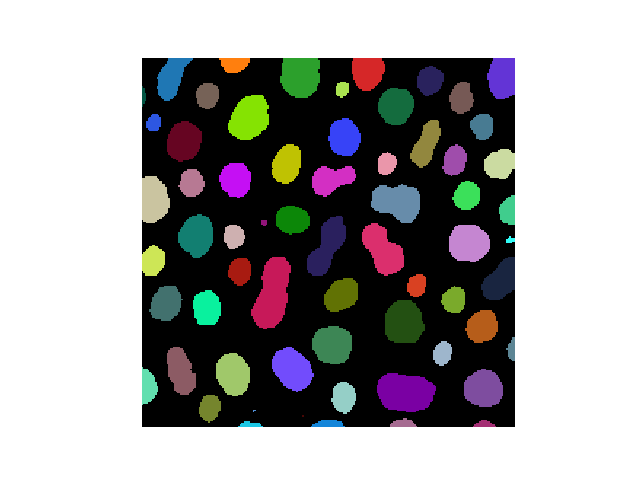

In [4]:
labels = cle.connected_component_labeling(binary.astype(np.uint8))
stackview.insight(labels)


### Measure area of each object

Using **regionprops_table** we extract the area (in voxels) for every label.

In [5]:
props = regionprops_table(labels,
                         intensity_image=None,
                         properties=['label', 'area'])
df = pd.DataFrame(props)
display(df.head())

average_area = df['area'].mean()
print('Average area of blobs:', average_area)


,label,area
0,1,433.0
1,2,185.0
2,3,658.0
3,4,434.0
4,5,477.0


Average area of blobs: 347.546875
